# 0. Enter to drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Github/Hackathon-BBVA-2022
!ls -a

/content/drive/MyDrive/Github/Hackathon-BBVA-2022
CHANGELOG.rst  .git	   House_prediction.ipynb  Models     requirements.txt
Dataset        .gitignore  LICENSE		   README.md


## 0.1. Connect to Github

In [28]:
!git checkout enzo

M	House_prediction.ipynb
Already on 'enzo'
Your branch is up to date with 'origin/enzo'.


In [29]:
!git status

On branch enzo
Your branch is up to date with 'origin/enzo'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   House_prediction.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add .gitignore
!git add CHANGELOG.rst
!git add Dataset
!git add House_prediction.ipynb
!git add README.md
!git add requirements.txt

In [ ]:
!git config --global user.email "enzo.cisneros@pucp.edu.pe"

In [ ]:
!git commit -m "0.0.2"

[enzo 06f6f2a] 0.0.2
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite House_prediction.ipynb (97%)


In [ ]:
!git status

On branch enzo
Your branch is ahead of 'origin/enzo' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [ ]:
!git push --set-upstream origin enzo

Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.56 KiB | 399.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/ECisneros20/Hackathon-BBVA-2022
   1f839bd..06f6f2a  enzo -> enzo
Branch 'enzo' set up to track remote branch 'enzo' from 'origin'.


In [ ]:
!git pull

Already up to date.


# 1. Data preprocessing

## 1.1. Load data

In [ ]:
#!gzip -dk Dataset/pe_properties.csv.gz

In [3]:
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
peru = pd.read_csv('Dataset/pe_properties.csv')

In [5]:
print("Original dataset shape: ", peru.shape, "\n")
peru.head()

Original dataset shape:  (100624, 25) 



,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,1qOI7X9aqAcO7PzjX1B29Q==,Propiedad,2021-06-03,2021-08-27,2021-06-03,NaN,NaN,Perú,Lima,Lima,...,5.0,NaN,NaN,450000.0,USD,NaN,CASA DE PLAYA VENDO EN LAS LAGUNAS,<b>CASA DE PLAYA VENDO EN LAS LAGUNAS</b><br><...,Casa,Venta
1,J350rcSI7Fx+92Wb1ev7rw==,Propiedad,2021-06-03,2021-07-07,2021-06-03,NaN,NaN,Perú,Arequipa,Arequipa,...,6.0,NaN,NaN,1050000.0,USD,NaN,HERMOSA CASA DE ENSUEÑOS EN CERRO COLORADO,<b>HERMOSA CASA DE ENSUEÑOS EN CERRO COLORADO<...,Casa,Venta
2,P+3USxoY2w5HQwg1N8JCtg==,Propiedad,2021-06-03,9999-12-31,2021-06-03,-8.095431,-79.05310,Perú,La Libertad,Trujillo,...,4.0,NaN,NaN,179000.0,USD,NaN,[ VENTA ]: ESTRENA TU CASA EN URB. SOL Y LUZ C...,<b>[ VENTA ]: ESTRENA TU CASA EN URB. SOL Y LU...,Casa,Venta
3,I9llUYb61GVgLNDUJ6CT5A==,Propiedad,2021-06-03,2021-06-04,2021-06-03,-13.840915,-76.25083,Perú,Ica,Ica,...,NaN,1120.0,NaN,52000.0,USD,Mensual,Lote venta,Hábitat VIp vende exclusivo terreno 1120 m2 e...,Lote,Venta
4,d7Sw3mL1Vq0dmzoXNpJUNQ==,Propiedad,2021-06-03,2021-06-04,2021-06-03,-12.799091,-76.56912,Perú,Lima,Lima,...,NaN,500.0,NaN,70000.0,USD,Mensual,Lote venta,Hábitat Vip Vende lote 500 m2 \r\nUbicado a ta...,Lote,Venta


In [6]:
peru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100624 entries, 0 to 100623
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               100624 non-null  object 
 1   ad_type          100624 non-null  object 
 2   start_date       100624 non-null  object 
 3   end_date         100624 non-null  object 
 4   created_on       100624 non-null  object 
 5   lat              86618 non-null   float64
 6   lon              86618 non-null   float64
 7   l1               100624 non-null  object 
 8   l2               100624 non-null  object 
 9   l3               97166 non-null   object 
 10  l4               78452 non-null   object 
 11  l5               45944 non-null   object 
 12  l6               834 non-null     object 
 13  rooms            2195 non-null    float64
 14  bedrooms         42210 non-null   float64
 15  bathrooms        76727 non-null   float64
 16  surface_total    17257 non-null   floa

In [7]:
print("Dataset shape: ", peru.shape, "\n")

for i in peru.columns:
  print(i, "count ->", peru[i].nunique())
  print(i, "nan ->", peru[i].isnull().sum())
  print(i, "nan ->", round(peru[i].isnull().sum() / peru.shape[0] * 100, 2), "%")
  if peru[i].nunique() < 10:
    print(i, "values ->", peru[i].unique())
  else:
    print(i, "values ->", peru[i].unique()[0:4])
  print("\n")

Dataset shape:  (100624, 25) 

id count -> 100624
id nan -> 0
id nan -> 0.0 %
id values -> ['1qOI7X9aqAcO7PzjX1B29Q==' 'J350rcSI7Fx+92Wb1ev7rw=='
 'P+3USxoY2w5HQwg1N8JCtg==' 'I9llUYb61GVgLNDUJ6CT5A==']


ad_type count -> 1
ad_type nan -> 0
ad_type nan -> 0.0 %
ad_type values -> ['Propiedad']


start_date count -> 388
start_date nan -> 0
start_date nan -> 0.0 %
start_date values -> ['2021-06-03' '2021-06-17' '2020-08-31' '2021-07-24']


end_date count -> 450
end_date nan -> 0
end_date nan -> 0.0 %
end_date values -> ['2021-08-27' '2021-07-07' '9999-12-31' '2021-06-04']


created_on count -> 388
created_on nan -> 0
created_on nan -> 0.0 %
created_on values -> ['2021-06-03' '2021-06-17' '2020-08-31' '2021-07-24']


lat count -> 28526
lat nan -> 14006
lat nan -> 13.92 %
lat values -> [        nan  -8.0954308 -13.8409149 -12.799091 ]


lon count -> 28247
lon nan -> 14006
lon nan -> 13.92 %
lon values -> [         nan -79.05310039 -76.2508304  -76.56912   ]


l1 count -> 1
l1 nan -> 0
l1 nan

### Drop not relevant and only one value columns:
- **id**: same amount as index
- **ad_type**: only one value
- **start_date**: not relevant
- **end_date**: not relevant
- **created_on**: not relevant
- **l1**: only one value
- **price**: 0.65% nan
- **currency**: 0.72% nan
- **price_period**: only one value
- **title**: not relevant
- **description**: not relevant
- **operation_type** = [Alquiler, Alquiler temporal] then [Venta]

### Keep columns:
- **lat**: 13.92% nan
- **lon**: 13.92% nan
- **l2**: 0.00% nan
- **l3**: 3.44% nan
- **l4**: 22.03% nan
- **l5**: 54.34% nan - too many nan values
- **l6**: 99.17% nan - too many nan values
- **rooms**: 97.82% nan - too many nan values
- **bedrooms**: 58.05% nan - too many nan values
- **bathrooms**: 23.75% nan
- **surface_total**: 82.85% nan - too many nan values
- **surface_covered**: 81.18% nan - too many nan values
- **price**: 99.35% not nan
- **property_type**: 0.00% nan

## 1.2. Drop not necessary columns

In [8]:
peru.drop(["id", "ad_type", "start_date", "end_date", "created_on", "l1", "price_period", "title", "description"], axis = 1, inplace = True)
peru = peru.loc[peru["operation_type"] == "Venta"]
peru.drop("operation_type", axis = 1, inplace = True)
peru = peru[peru["price"].notna()]
peru.reset_index(drop = True, inplace = True)
print("New dataset shape: ", peru.shape, "\n")
peru.head()

New dataset shape:  (67977, 15) 



,lat,lon,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type
0,NaN,NaN,Lima,Lima,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,450000.0,USD,Casa
1,NaN,NaN,Arequipa,Arequipa,Yanahuara,NaN,NaN,NaN,4.0,6.0,NaN,NaN,1050000.0,USD,Casa
2,-8.095431,-79.05310,La Libertad,Trujillo,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,179000.0,USD,Casa
3,-13.840915,-76.25083,Ica,Ica,NaN,NaN,NaN,1.0,NaN,NaN,1120.0,NaN,52000.0,USD,Lote
4,-12.799091,-76.56912,Lima,Lima,NaN,NaN,NaN,1.0,NaN,NaN,500.0,NaN,70000.0,USD,Lote


## 1.3. Change prices to only USD currency

In [9]:
peru["currency"].value_counts()

USD    64254
PEN     3682
Name: currency, dtype: int64

In [10]:
change_PEN_to_USD = 1 / 4

peru["price"][peru["currency"] == "PEN"] = peru["price"] * change_PEN_to_USD
peru.drop("currency", axis = 1, inplace = True)
peru.reset_index(drop = True, inplace = True)
print("New dataset shape: ", peru.shape, "\n")
peru.head()

New dataset shape:  (67977, 14) 



,lat,lon,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,NaN,NaN,Lima,Lima,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,450000.0,Casa
1,NaN,NaN,Arequipa,Arequipa,Yanahuara,NaN,NaN,NaN,4.0,6.0,NaN,NaN,1050000.0,Casa
2,-8.095431,-79.05310,La Libertad,Trujillo,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,179000.0,Casa
3,-13.840915,-76.25083,Ica,Ica,NaN,NaN,NaN,1.0,NaN,NaN,1120.0,NaN,52000.0,Lote
4,-12.799091,-76.56912,Lima,Lima,NaN,NaN,NaN,1.0,NaN,NaN,500.0,NaN,70000.0,Lote


## 1.4. Evaluate nan values from kept columns

### Kept columns:
- **lat**: 13.92% nan
- **lon**: 13.92% nan
- **l2**: 0.00% nan
- **l3**: 3.44% nan
- **l4**: 22.03% nan
- **l5**: 54.34% nan - too many nan values
- **l6**: 99.17% nan - too many nan values
- **rooms**: 97.82% nan - too many nan values
- **bedrooms**: 58.05% nan - too many nan values
- **bathrooms**: 23.75% nan
- **surface_total**: 82.85% nan - too many nan values
- **surface_covered**: 81.18% nan - too many nan values
- **price**: 99.35% not nan
- **property_type**: 0.00% nan

In [11]:
print("Dataset shape: ", peru.shape, "\n")

for i in peru.columns:
  print(i, "count ->", peru[i].nunique())
  print(i, "nan ->", peru[i].isnull().sum())
  print(i, "nan ->", round(peru[i].isnull().sum() / peru.shape[0] * 100, 2), "%")
  if peru[i].nunique() < 10:
    print(i, "values ->", peru[i].unique())
  else:
    print(i, "values ->", peru[i].unique()[0:4])
  print("\n")

Dataset shape:  (67977, 14) 

lat count -> 19428
lat nan -> 9298
lat nan -> 13.68 %
lat values -> [        nan  -8.0954308 -13.8409149 -12.799091 ]


lon count -> 19230
lon nan -> 9298
lon nan -> 13.68 %
lon values -> [         nan -79.05310039 -76.2508304  -76.56912   ]


l2 count -> 25
l2 nan -> 0
l2 nan -> 0.0 %
l2 values -> ['Lima' 'Arequipa' 'La Libertad' 'Ica']


l3 count -> 91
l3 nan -> 2652
l3 nan -> 3.9 %
l3 values -> ['Lima' 'Arequipa' 'Trujillo' 'Ica']


l4 count -> 219
l4 nan -> 16709
l4 nan -> 24.58 %
l4 values -> [nan 'Yanahuara' 'Piura' 'Lima Centro']


l5 count -> 60
l5 nan -> 37868
l5 nan -> 55.71 %
l5 values -> [nan 'Lince' 'Rímac' 'La Molina']


l6 count -> 81
l6 nan -> 67374
l6 nan -> 99.11 %
l6 values -> [nan 'Santa Catalina' 'José Gálvez' 'La Calera de la Merced']


rooms count -> 18
rooms nan -> 66610
rooms nan -> 97.99 %
rooms values -> [nan  1.  2.  3.]


bedrooms count -> 24
bedrooms nan -> 40010
bedrooms nan -> 58.86 %
bedrooms values -> [ 4.  5. nan  3.]


b

In [12]:
for i in peru.columns:

  if (peru[i].nunique() < 25):

    print("{} -> {}".format(i, peru[i].unique()))

  else:

    not_nan = peru[i].notna().sum()
    nan = peru[i].isnull().sum()
    
    print("{} -> not nan {}, nan {}".format(i, not_nan, nan))

lat -> not nan 58679, nan 9298
lon -> not nan 58679, nan 9298
l2 -> not nan 67977, nan 0
l3 -> not nan 65325, nan 2652
l4 -> not nan 51268, nan 16709
l5 -> not nan 30109, nan 37868
l6 -> not nan 603, nan 67374
rooms -> [nan  1.  2.  3.  4.  7. 10.  6.  9.  5. 16. 15.  8. 22. 20. 14. 13. 18.
 12.]
bedrooms -> [ 4.  5. nan  3.  2.  8.  1. 11.  0. 10. 12.  6.  7. 17.  9. 20. 15. 14.
 13. 18. 16. 22. 25. 19. 60.]
bathrooms -> [ 5.  6.  4. nan  2.  1.  3.  8.  7. 10. 19. 12.  9. 14. 20. 11. 15. 18.
 13. 16.]
surface_total -> not nan 9925, nan 58052
surface_covered -> not nan 11383, nan 56594
price -> not nan 67977, nan 0
property_type -> ['Casa' 'Lote' 'Otro' 'Departamento' 'Depósito' 'Local comercial'
 'Oficina' 'Casa de campo' 'PH']


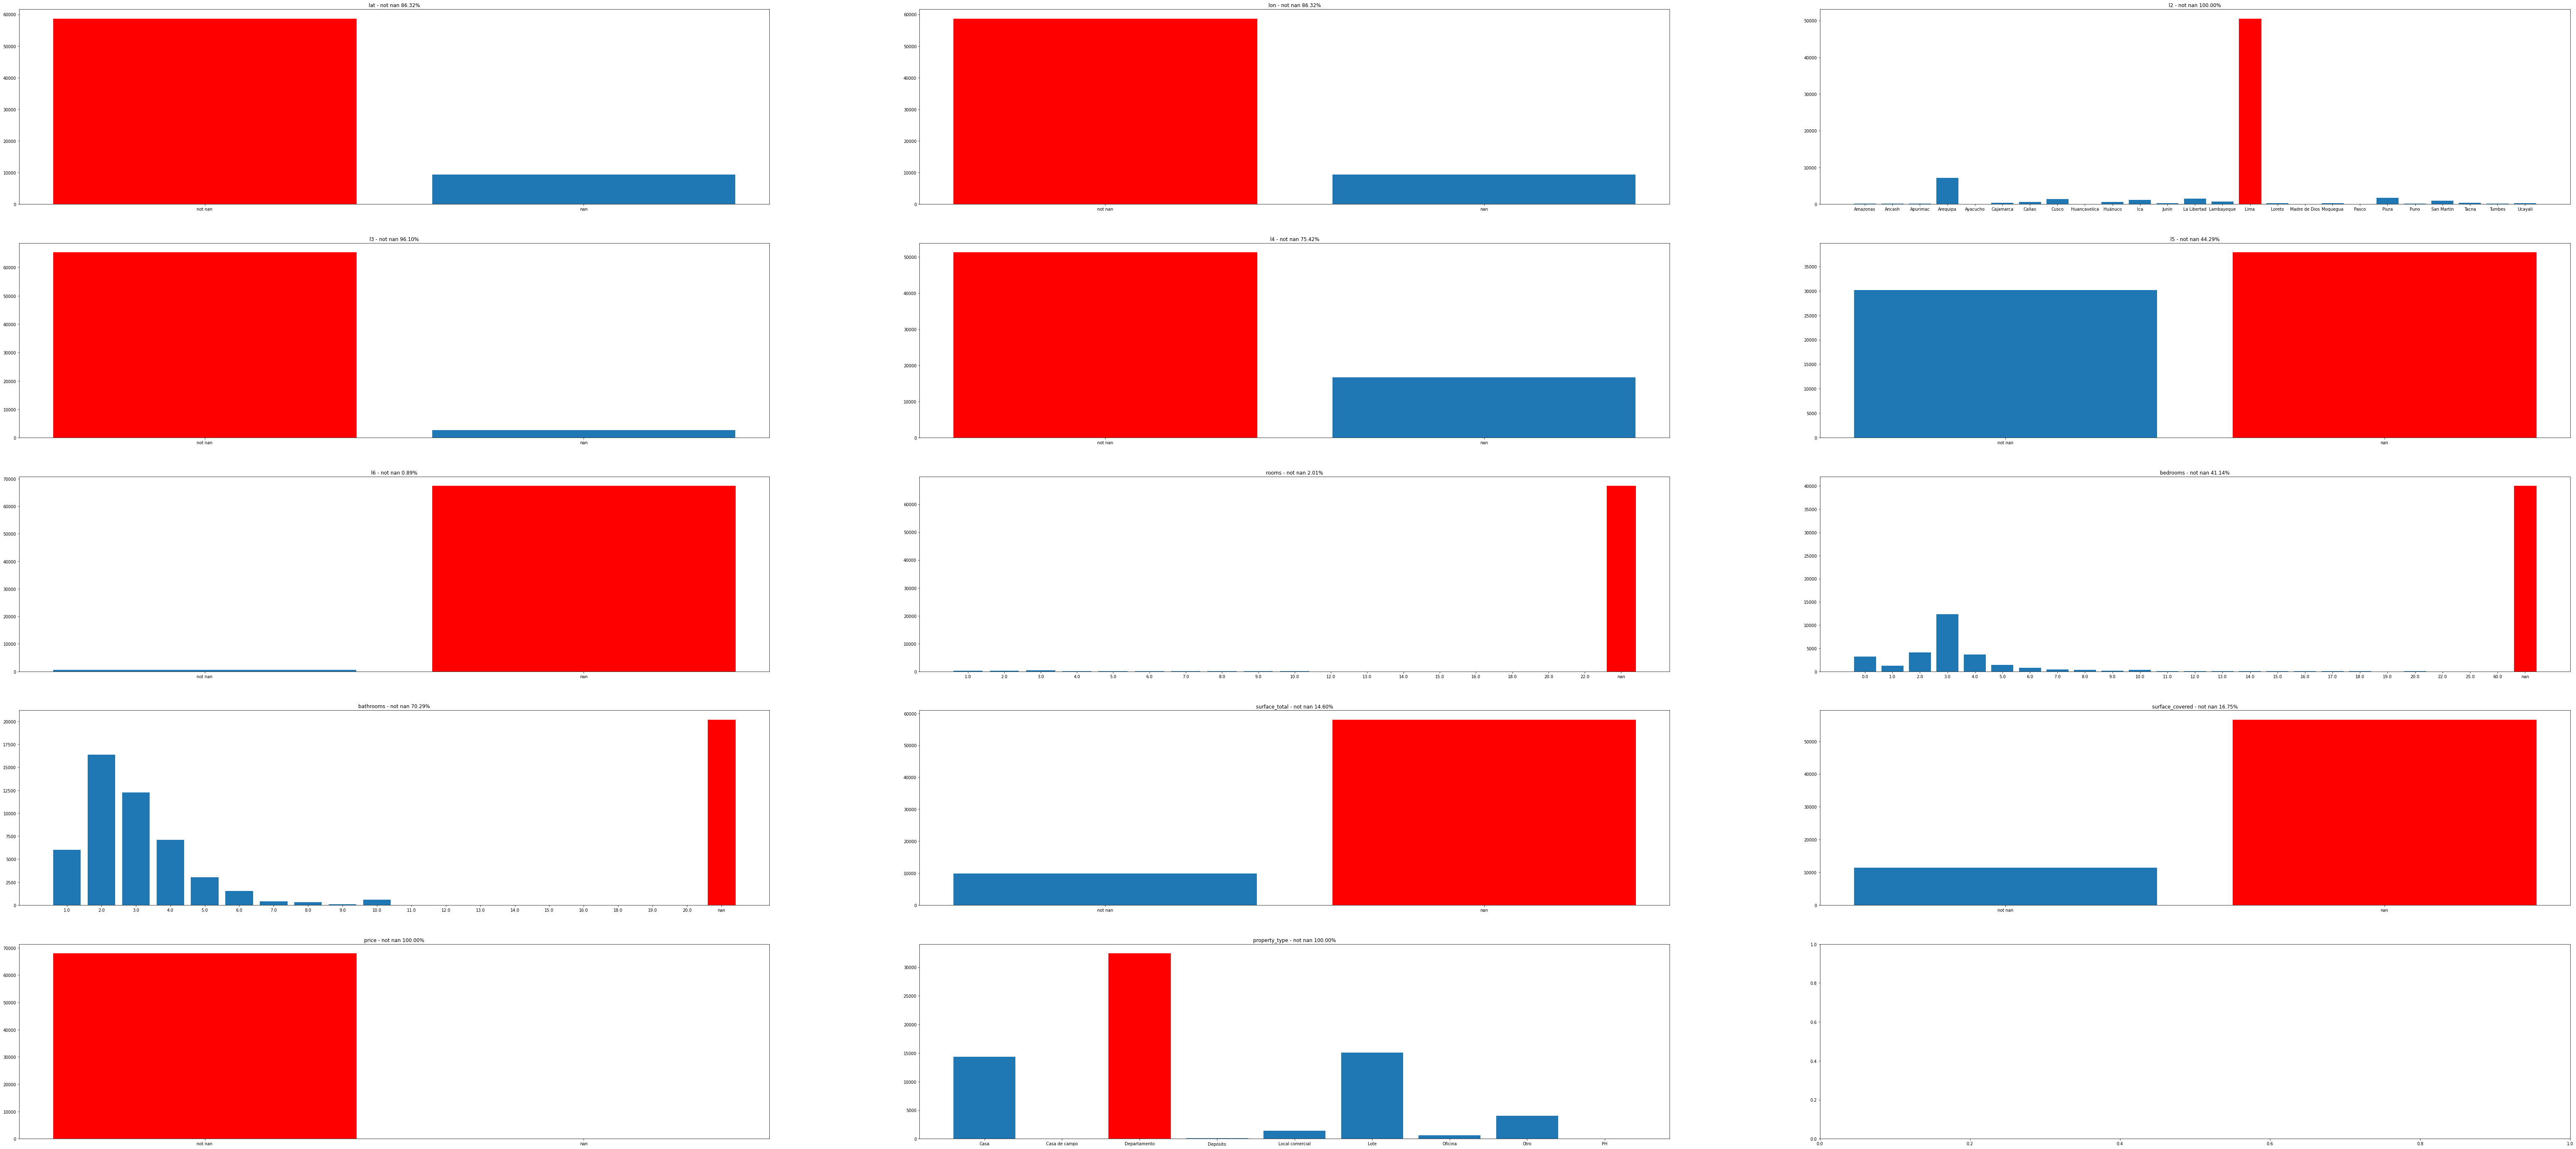

In [13]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (110, 50))
count = 0

for i in peru.columns:

  if (peru[i].nunique() < 26):

    index = np.sort(peru[i].unique())
    index = index.astype(str)

    counts = peru[i].value_counts(dropna = False).sort_index()

    ax = axes[int(count / 3)][count % 3]

    max_value = np.argmax(counts)

    ax.bar(index, counts)[max_value].set_color('r')
    title = "{} - not nan {:.2f}%".format(i, peru[i].notna().sum() / peru.shape[0] * 100)
    ax.set_title(title)

  else:

    index = ["not nan", "nan"]

    not_nan = peru[i].notna().sum()
    nan = peru[i].isnull().sum()
    counts = np.array([not_nan, nan])
    
    ax = axes[int(count / 3)][count % 3]

    max_value = np.argmax(counts)

    ax.bar(index, counts)[max_value].set_color('r')
    title = "{} - not nan {:.2f}%".format(i, not_nan / peru.shape[0] * 100)
    ax.set_title(title)

  count += 1

### Kept columns (new percentages):
- **lat**: 13.68% nan
- **lon**: 13.68% nan
- **l2**: 0.00% nan
- **l3**: 3.90% nan
- **l4**: 24.58% nan
- **l5**: 55.71% nan - too many nan values
- **l6**: 99.11% nan - too many nan values
- **rooms**: 97.99% nan - too many nan values
- **bedrooms**: 58.86% nan - too many nan values
- **bathrooms**: 29.71% nan
- **surface_total**: 85.40% nan - too many nan values
- **surface_covered**: 83.25% nan - too many nan values
- **price**: 0.00% nan
- **property_type**: 0.00% nan

## **Option 1 (mean, median and mode)**:
### Drop columns:
- **l5**: 55.71% nan - too many nan values
- **l6**: 99.11% nan - too many nan values
- **rooms**: 97.99% nan - too many nan values
- **bedrooms**: 58.86% nan - too many nan values
- **surface_total**: 85.40% nan - too many nan values
- **surface_covered**: 83.25% nan - too many nan values

### Keep columns:
- **lat**: 13.68% nan
- **lon**: 13.68% nan
- **l2**: 0.00% nan
- **l3**: 3.90% nan
- **l4**: 24.58% nan
- **bathrooms**: 29.71% nan
- **price**: 0.00% nan
- **property_type**: 0.00% nan

## **Option 2 (mean, median and mode)**:
### Drop columns:
- **l2**: 0.00% nan - not relevant
- **l3**: 3.90% nan - not relevant
- **l4**: 24.58% nan - not relevant
- **l5**: 55.71% nan - too many nan values
- **l6**: 99.11% nan - too many nan values
- **rooms**: 97.99% nan - too many nan values
- **bedrooms**: 58.86% nan - too many nan values
- **surface_total**: 85.40% nan - too many nan values
- **surface_covered**: 83.25% nan - too many nan values

### Keep columns:
- **lat**: based on l2 to l6
- **lon**: based on l2 to l6
- **bathrooms**: 29.71% nan
- **price**: 0.00% nan
- **property_type**: 0.00% nan

# 2. Option 1

In [14]:
peru_1 = peru.copy()
peru_1.drop(["l5", "l6", "rooms", "bedrooms", "surface_total", "surface_covered"], axis = 1, inplace = True)
peru_1.reset_index(drop = True, inplace = True)
print("New dataset shape: ", peru_1.shape, "\n")
peru_1.head()

New dataset shape:  (67977, 8) 



,lat,lon,l2,l3,l4,bathrooms,price,property_type
0,NaN,NaN,Lima,Lima,NaN,5.0,450000.0,Casa
1,NaN,NaN,Arequipa,Arequipa,Yanahuara,6.0,1050000.0,Casa
2,-8.095431,-79.05310,La Libertad,Trujillo,NaN,4.0,179000.0,Casa
3,-13.840915,-76.25083,Ica,Ica,NaN,NaN,52000.0,Lote
4,-12.799091,-76.56912,Lima,Lima,NaN,NaN,70000.0,Lote


In [15]:
num_vars = [c for c in peru_1 if pd.api.types.is_numeric_dtype(peru_1[c])]
num_vars

['lat', 'lon', 'bathrooms', 'price']

In [16]:
cat_vars = [c for c in peru_1 if not pd.api.types.is_numeric_dtype(peru_1[c])]
cat_vars

['l2', 'l3', 'l4', 'property_type']

## 2.1. Missing-data imputation

In [17]:
from sklearn_pandas import CategoricalImputer
import numpy as np

for cat in cat_vars:

  imputer = CategoricalImputer()
  data = np.array(peru_1[cat], dtype = object)
  peru_1[cat] = imputer.fit_transform(data)

peru_1.reset_index(drop = True, inplace = True)
print("New dataset shape: ", peru_1.shape, "\n")
peru_1.head()

New dataset shape:  (67977, 8) 



,lat,lon,l2,l3,l4,bathrooms,price,property_type
0,NaN,NaN,Lima,Lima,Lima Centro,5.0,450000.0,Casa
1,NaN,NaN,Arequipa,Arequipa,Yanahuara,6.0,1050000.0,Casa
2,-8.095431,-79.05310,La Libertad,Trujillo,Lima Centro,4.0,179000.0,Casa
3,-13.840915,-76.25083,Ica,Ica,Lima Centro,NaN,52000.0,Lote
4,-12.799091,-76.56912,Lima,Lima,Lima Centro,NaN,70000.0,Lote


## 2.2. Converting categorical variables into numerical values

In [18]:
for cat in cat_vars:

  peru_1[cat] = peru_1[cat].astype("category")
  peru_1[cat] = peru_1[cat].cat.codes

peru_1.reset_index(drop = True, inplace = True)
print("New dataset shape: ", peru_1.shape, "\n")
peru_1.head()

New dataset shape:  (67977, 8) 



,lat,lon,l2,l3,l4,bathrooms,price,property_type
0,NaN,NaN,14,54,96,5.0,450000.0,0
1,NaN,NaN,3,4,213,6.0,1050000.0,0
2,-8.095431,-79.05310,12,84,96,4.0,179000.0,0
3,-13.840915,-76.25083,10,44,96,NaN,52000.0,5
4,-12.799091,-76.56912,14,54,96,NaN,70000.0,5


## 2.3. Option 1 - mean

In [19]:
peru_1_mean = peru_1.copy()

for num in num_vars:

  mean = peru_1[num].mean()

  if num == "bathrooms":
    mean = round(mean)
  
  peru_1_mean[num] = np.nan_to_num(peru_1_mean[num], nan = mean)

peru_1_mean.reset_index(drop = True, inplace = True)
peru_1_mean = peru_1_mean.astype({"bathrooms":np.int8})
print("New dataset shape: ", peru_1_mean.shape, "\n")
peru_1_mean.head()

New dataset shape:  (67977, 8) 



,lat,lon,l2,l3,l4,bathrooms,price,property_type
0,-12.086602,-76.428613,14,54,96,5,450000.0,0
1,-12.086602,-76.428613,3,4,213,6,1050000.0,0
2,-8.095431,-79.053100,12,84,96,4,179000.0,0
3,-13.840915,-76.250830,10,44,96,3,52000.0,5
4,-12.799091,-76.569120,14,54,96,3,70000.0,5


## 2.4. Option 1 - median

In [20]:
peru_1_median = peru_1.copy()

for num in num_vars:

  median = peru_1[num].median()

  if num == "bathrooms":
    median = round(median)
  
  peru_1_median[num] = np.nan_to_num(peru_1_median[num], nan = median)

peru_1_median.reset_index(drop = True, inplace = True)
peru_1_median = peru_1_median.astype({"bathrooms":np.int8})
print("New dataset shape: ", peru_1_median.shape, "\n")
peru_1_median.head()

New dataset shape:  (67977, 8) 



,lat,lon,l2,l3,l4,bathrooms,price,property_type
0,-12.096000,-77.002228,14,54,96,5,450000.0,0
1,-12.096000,-77.002228,3,4,213,6,1050000.0,0
2,-8.095431,-79.053100,12,84,96,4,179000.0,0
3,-13.840915,-76.250830,10,44,96,3,52000.0,5
4,-12.799091,-76.569120,14,54,96,3,70000.0,5


## 2.5. Option 1 - mode

In [21]:
peru_1_mode = peru_1.copy()

for num in num_vars:

  mode = peru_1[num].mode()
  
  if num == "bathrooms":
    mode = round(mode)
  
  peru_1_mode[num] = np.nan_to_num(peru_1_mode[num], nan = mode)

peru_1_mode.reset_index(drop = True, inplace = True)
peru_1_mode = peru_1_mode.astype({"bathrooms":np.int8})
print("New dataset shape: ", peru_1_mode.shape, "\n")
peru_1_mode.head()

New dataset shape:  (67977, 8) 



,lat,lon,l2,l3,l4,bathrooms,price,property_type
0,-12.095444,-76.994709,14,54,96,5,450000.0,0
1,-12.095444,-76.994709,3,4,213,6,1050000.0,0
2,-8.095431,-79.053100,12,84,96,4,179000.0,0
3,-13.840915,-76.250830,10,44,96,2,52000.0,5
4,-12.799091,-76.569120,14,54,96,2,70000.0,5


In [22]:
peru_1_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67977 entries, 0 to 67976
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lat            67977 non-null  float64
 1   lon            67977 non-null  float64
 2   l2             67977 non-null  int8   
 3   l3             67977 non-null  int8   
 4   l4             67977 non-null  int16  
 5   bathrooms      67977 non-null  int8   
 6   price          67977 non-null  float64
 7   property_type  67977 non-null  int8   
dtypes: float64(3), int16(1), int8(4)
memory usage: 1.9 MB


In [23]:
peru_1_mean.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,67977.0,-12.086602,2.201851e+00,-18.297014,-12.136794,-12.086602,-12.057099,-3.493000e+00
lon,67977.0,-76.428613,1.948819e+00,-81.306375,-77.045510,-76.984786,-76.428613,-6.905579e+01
l2,67977.0,12.721597,4.033402e+00,0.000000,14.000000,14.000000,14.000000,2.400000e+01
l3,67977.0,47.518161,1.823243e+01,0.000000,54.000000,54.000000,54.000000,9.000000e+01
l4,67977.0,101.372935,3.720998e+01,0.000000,96.000000,96.000000,99.000000,2.180000e+02
bathrooms,67977.0,2.974712,1.394887e+00,1.000000,2.000000,3.000000,3.000000,2.000000e+01
price,67977.0,457399.610578,4.614266e+06,0.000000,93000.000000,178000.000000,352000.000000,8.500000e+08
property_type,67977.0,2.616385,2.041811e+00,0.000000,2.000000,2.000000,5.000000,8.000000e+00


In [24]:
peru_1_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67977 entries, 0 to 67976
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lat            67977 non-null  float64
 1   lon            67977 non-null  float64
 2   l2             67977 non-null  int8   
 3   l3             67977 non-null  int8   
 4   l4             67977 non-null  int16  
 5   bathrooms      67977 non-null  int8   
 6   price          67977 non-null  float64
 7   property_type  67977 non-null  int8   
dtypes: float64(3), int16(1), int8(4)
memory usage: 1.9 MB


In [25]:
peru_1_median.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,67977.0,-12.087887,2.201853e+00,-18.297014,-12.136794,-12.096000,-12.057099,-3.493000e+00
lon,67977.0,-76.507073,1.958761e+00,-81.306375,-77.045510,-77.002228,-76.920116,-6.905579e+01
l2,67977.0,12.721597,4.033402e+00,0.000000,14.000000,14.000000,14.000000,2.400000e+01
l3,67977.0,47.518161,1.823243e+01,0.000000,54.000000,54.000000,54.000000,9.000000e+01
l4,67977.0,101.372935,3.720998e+01,0.000000,96.000000,96.000000,99.000000,2.180000e+02
bathrooms,67977.0,2.974712,1.394887e+00,1.000000,2.000000,3.000000,3.000000,2.000000e+01
price,67977.0,457399.610578,4.614266e+06,0.000000,93000.000000,178000.000000,352000.000000,8.500000e+08
property_type,67977.0,2.616385,2.041811e+00,0.000000,2.000000,2.000000,5.000000,8.000000e+00


In [26]:
peru_1_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67977 entries, 0 to 67976
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lat            67977 non-null  float64
 1   lon            67977 non-null  float64
 2   l2             67977 non-null  int8   
 3   l3             67977 non-null  int8   
 4   l4             67977 non-null  int16  
 5   bathrooms      67977 non-null  int8   
 6   price          67977 non-null  float64
 7   property_type  67977 non-null  int8   
dtypes: float64(3), int16(1), int8(4)
memory usage: 1.9 MB


In [27]:
peru_1_mode.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,67977.0,-12.087811,2.201853e+00,-18.297014,-12.136794,-12.095444,-12.057099,-3.493000e+00
lon,67977.0,-76.506044,1.958503e+00,-81.306375,-77.045510,-76.994709,-76.920116,-6.905579e+01
l2,67977.0,12.721597,4.033402e+00,0.000000,14.000000,14.000000,14.000000,2.400000e+01
l3,67977.0,47.518161,1.823243e+01,0.000000,54.000000,54.000000,54.000000,9.000000e+01
l4,67977.0,101.372935,3.720998e+01,0.000000,96.000000,96.000000,99.000000,2.180000e+02
bathrooms,67977.0,2.677597,1.462711e+00,1.000000,2.000000,2.000000,3.000000,2.000000e+01
price,67977.0,457399.610578,4.614266e+06,0.000000,93000.000000,178000.000000,352000.000000,8.500000e+08
property_type,67977.0,2.616385,2.041811e+00,0.000000,2.000000,2.000000,5.000000,8.000000e+00
